<a href="https://colab.research.google.com/github/mherbsom/AAE590/blob/main/3_5_590inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

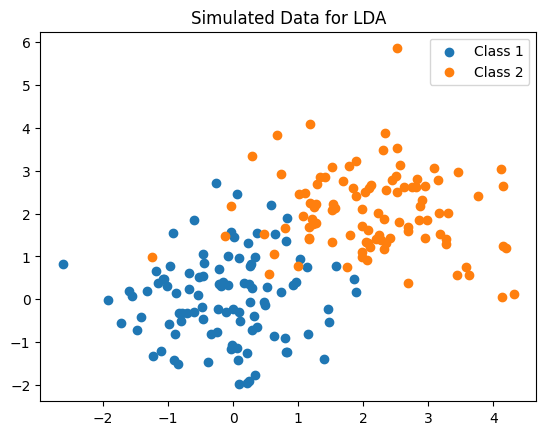

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulating two classes of data
np.random.seed(42)
class1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)
class2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)

plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.legend()
plt.title('Simulated Data for LDA')
plt.show()

In [2]:
# Combine classes and create labels
X = np.vstack((class1, class2))
y = np.hstack((np.zeros(100), np.ones(100)))

# Separate data by class
class1 = X[y == 0]
class2 = X[y == 1]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Number of samples in Class 1:", class1.shape[0])
print("Number of samples in Class 2:", class2.shape[0])

Shape of X: (200, 2)
Shape of y: (200,)
Number of samples in Class 1: 100
Number of samples in Class 2: 100


Mean of Class 1: [-0.11556425  0.03402232]
Mean of Class 2: [2.12824872 2.04348765]


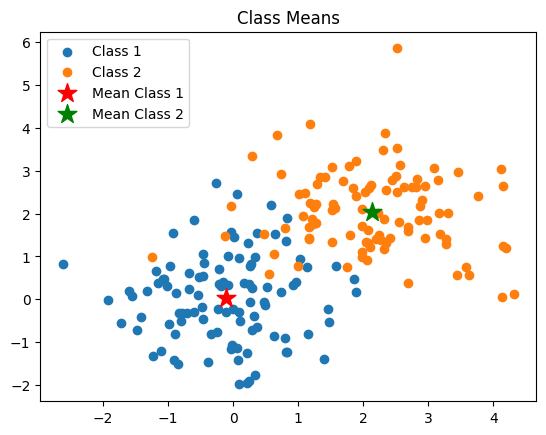

In [3]:
# Calculate class means
mean1 = np.mean(class1, axis=0)
mean2 = np.mean(class2, axis=0)

print("Mean of Class 1:", mean1)
print("Mean of Class 2:", mean2)

# Visualize class means
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(mean1[0], mean1[1], color='red', s=200, marker='*', label='Mean Class 1')
plt.scatter(mean2[0], mean2[1], color='green', s=200, marker='*', label='Mean Class 2')
plt.legend()
plt.title('Class Means')
plt.show()

In [4]:
# Compute within-class scatter matrix
S_W = np.zeros((2, 2))
for c, mean in [(class1, mean1), (class2, mean2)]:
    S_c = np.zeros((2, 2))
    for sample in c:
        diff = (sample - mean).reshape(2, 1)
        S_c += np.dot(diff, diff.T)
    S_W += S_c

print("Within-class scatter matrix:")
print(S_W)

Within-class scatter matrix:
[[179.58654633  -5.30537   ]
 [ -5.30537    185.28344225]]


In [5]:
# Compute overall mean
mean_overall = np.mean(X, axis=0)

# Compute between-class scatter matrix
n1, n2 = class1.shape[0], class2.shape[0]
diff1 = (mean1 - mean_overall).reshape(2, 1)
diff2 = (mean2 - mean_overall).reshape(2, 1)
S_B = n1 * np.dot(diff1, diff1.T) + n2 * np.dot(diff2, diff2.T)

print("Between-class scatter matrix:")
print(S_B)

Between-class scatter matrix:
[[251.73483433 225.44321887]
 [225.44321887 201.89754457]]


In [6]:
# Solve the generalized eigenvalue problem
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# Sort eigenvectors by eigenvalues in descending order
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Select the eigenvector with the largest eigenvalue
w = eigvecs[:, 0]

print("Largest eigenvalue:", eigvals[0])
print("Corresponding eigenvector:", w)

Largest eigenvalue: 2.5654759962891216
Corresponding eigenvector: [0.75286088 0.65817969]


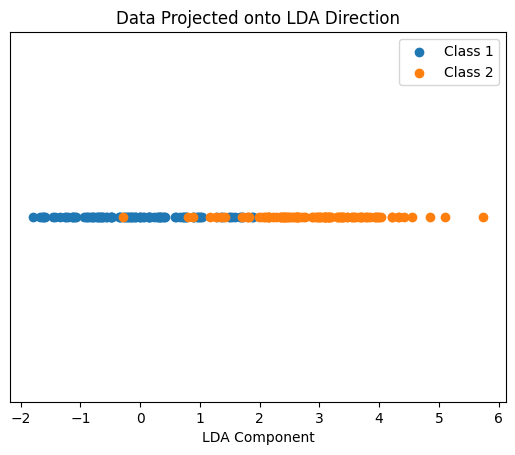

In [7]:
# Project data onto LDA direction
X_projected = X.dot(w)

# Visualize projected data
plt.scatter(X_projected[y == 0], np.zeros(n1), label='Class 1')
plt.scatter(X_projected[y == 1], np.zeros(n2), label='Class 2')
plt.legend()
plt.title('Data Projected onto LDA Direction')
plt.xlabel('LDA Component')
plt.yticks([])
plt.show()

Test point [1 1] classified as Class 0


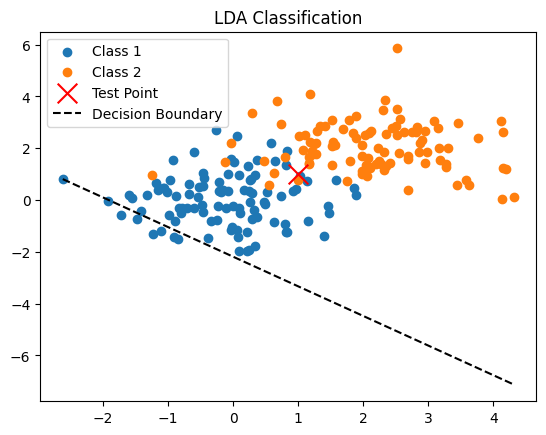

In [8]:
def lda_classify(x, w, mean1, mean2):
    # Project class means onto LDA direction
    m1 = w.dot(mean1)
    m2 = w.dot(mean2)

    # Compute midpoint
    midpoint = (m1 + m2) / 2

    # Project data point
    projection = w.dot(x)

    # Classify based on which side of the midpoint the projection falls
    return 0 if projection < midpoint else 1

# Test the classifier
test_point = np.array([1, 1])
prediction = lda_classify(test_point, w, mean1, mean2)
print(f"Test point {test_point} classified as Class {prediction}")

# Visualize decision boundary
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(test_point[0], test_point[1], color='red', s=200, marker='x', label='Test Point')

# Plot decision boundary
boundary_x = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
boundary_y = -(w[0] * boundary_x + (w.dot(mean1 + mean2) / 2)) / w[1]
plt.plot(boundary_x, boundary_y, 'k--', label='Decision Boundary')

plt.legend()
plt.title('LDA Classification')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LDA on training data
class1_train = X_train[y_train == 0]
class2_train = X_train[y_train == 1]
mean1_train = np.mean(class1_train, axis=0)
mean2_train = np.mean(class2_train, axis=0)

# Compute scatter matrices and LDA direction using training data
S_W_train = np.zeros((2, 2))
for c, mean in [(class1_train, mean1_train), (class2_train, mean2_train)]:
    S_c = np.zeros((2, 2))
    for sample in c:
        diff = (sample - mean).reshape(2, 1)
        S_c += np.dot(diff, diff.T)
    S_W_train += S_c

mean_overall_train = np.mean(X_train, axis=0)
n1_train, n2_train = class1_train.shape[0], class2_train.shape[0]
diff1_train = (mean1_train - mean_overall_train).reshape(2, 1)
diff2_train = (mean2_train - mean_overall_train).reshape(2, 1)
S_B_train = n1_train * np.dot(diff1_train, diff1_train.T) + n2_train * np.dot(diff2_train, diff2_train.T)

eigvals_train, eigvecs_train = np.linalg.eig(np.linalg.inv(S_W_train).dot(S_B_train))
w_train = eigvecs_train[:, eigvals_train.argsort()[::-1][0]]

# Predict on test data
y_pred = np.array([lda_classify(x, w_train, mean1_train, mean2_train) for x in X_test])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Accuracy: {accuracy:.2f}")

LDA Accuracy: 0.95


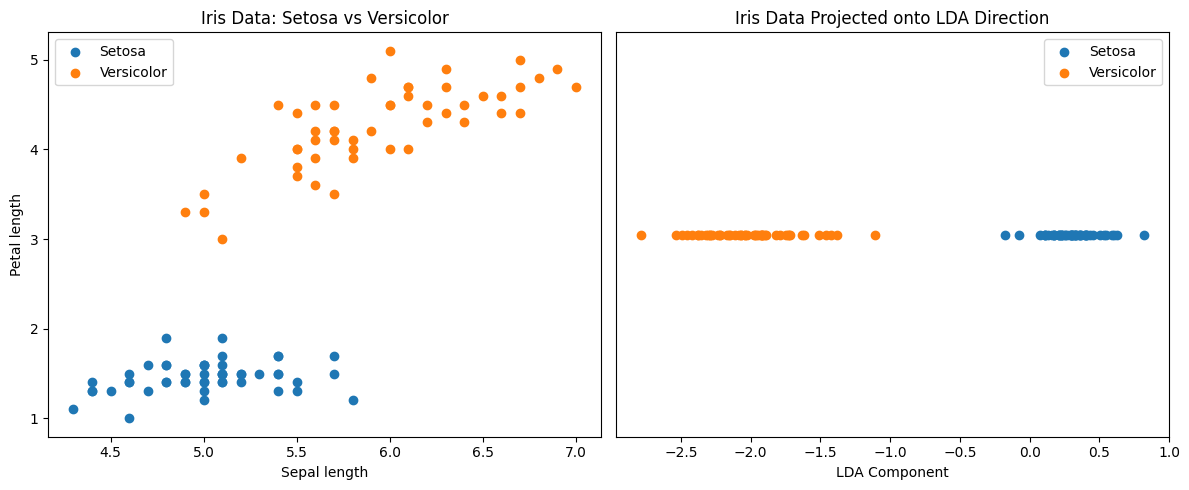

In [10]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Select two features and two classes for visualization
X_iris_subset = X_iris[:100, [0, 2]]  # Sepal length and petal length
y_iris_subset = y_iris[:100]  # Setosa and Versicolor

# Train LDA on Iris subset
class1_iris = X_iris_subset[y_iris_subset == 0]
class2_iris = X_iris_subset[y_iris_subset == 1]
mean1_iris = np.mean(class1_iris, axis=0)
mean2_iris = np.mean(class2_iris, axis=0)

# Compute LDA direction for Iris data
S_W_iris = np.zeros((2, 2))
for c, mean in [(class1_iris, mean1_iris), (class2_iris, mean2_iris)]:
    S_c = np.zeros((2, 2))
    for sample in c:
        diff = (sample - mean).reshape(2, 1)
        S_c += np.dot(diff, diff.T)
    S_W_iris += S_c

mean_overall_iris = np.mean(X_iris_subset, axis=0)
n1_iris, n2_iris = class1_iris.shape[0], class2_iris.shape[0]
diff1_iris = (mean1_iris - mean_overall_iris).reshape(2, 1)
diff2_iris = (mean2_iris - mean_overall_iris).reshape(2, 1)
S_B_iris = n1_iris * np.dot(diff1_iris, diff1_iris.T) + n2_iris * np.dot(diff2_iris, diff2_iris.T)

eigvals_iris, eigvecs_iris = np.linalg.eig(np.linalg.inv(S_W_iris).dot(S_B_iris))
w_iris = eigvecs_iris[:, eigvals_iris.argsort()[::-1][0]]

# Visualize Iris data and LDA projection
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(class1_iris[:, 0], class1_iris[:, 1], label='Setosa')
plt.scatter(class2_iris[:, 0], class2_iris[:, 1], label='Versicolor')
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.title('Iris Data: Setosa vs Versicolor')

plt.subplot(122)
X_iris_projected = X_iris_subset.dot(w_iris)
plt.scatter(X_iris_projected[y_iris_subset == 0], np.zeros(50), label='Setosa')
plt.scatter(X_iris_projected[y_iris_subset == 1], np.zeros(50), label='Versicolor')
plt.xlabel('LDA Component')
plt.yticks([])
plt.legend()
plt.title('Iris Data Projected onto LDA Direction')

plt.tight_layout()
plt.show()

# Can be important for LDA

In [ ]:
def lda_classify(x, w, mean1, mean2):
    # Project class means onto LDA direction
    m1 = w.dot(mean1)
    m2 = w.dot(mean2)

    # Compute midpoint
    midpoint = (m1 + m2) / 2

    # Project data point
    projection = w.dot(x)

    # Classify based on which side of the midpoint the projection falls
    return 0 if projection < midpoint else 1

# Test the classifier
test_point = np.array([1, 1])
prediction = lda_classify(test_point, w, mean1, mean2)
print(f"Test point {test_point} classified as Class {prediction}")

# Visualize decision boundary
plt.scatter(class1[:, 0], class1[:, 1], label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], label='Class 2')
plt.scatter(test_point[0], test_point[1], color='red', s=200, marker='x', label='Test Point')

# Plot decision boundary
boundary_x = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
boundary_y = -(w[0] * boundary_x + (w.dot(mean1 + mean2) / 2)) / w[1]
plt.plot(boundary_x, boundary_y, 'k--', label='Decision Boundary')

plt.legend()
plt.title('LDA Classification')
plt.show()

# LDA vs. PCA

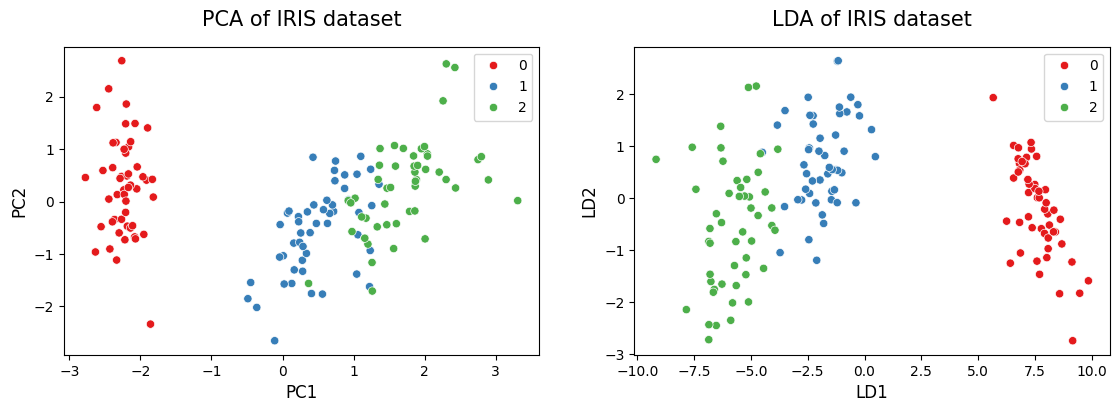

In [13]:
!pip install scikit-learn
import sklearn
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
X = iris.data
y = iris.target

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=2, solver='svd')
X_lda = lda.fit_transform(X, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X_pca[:,0],y= X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(x=X_lda[:,0],y= X_lda[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of IRIS dataset", fontsize=15, pad=15)
ax[1].set_title("LDA of IRIS dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("LD1", fontsize=12)
ax[1].set_ylabel("LD2", fontsize=12)
plt.savefig('PCA vs LDA.png', dpi=80)